In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Resample Data Into New Dataset

# Resample Train Data

In [2]:
from common.src import resample as res

In [3]:
from imblearn.under_sampling import EditedNearestNeighbours

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
ENN = EditedNearestNeighbours()

In [4]:
res.resample_directory(ENN, path, 'ENN', val = False)

# Load Data

In [5]:
train_folder= './common/data/resampled/ENN/train'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [7]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

In [8]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/resampled/ENN/train')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/') 

Found 4963 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [9]:
from common.src import models

cnn = models.CNNModel(patience_s = 19)
cnn.create_model()
cnn.summary()

# Fit Model

In [10]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs=20)

Epoch 1/20
163/163 [==============================] - 33s 204ms/step - loss: 0.3144 - tp: 4470.0000 - fp: 691.0000 - tn: 4496.0000 - fn: 717.0000 - accuracy: 0.8643 - precision: 0.8661 - recall: 0.8618 - auc: 0.9395 - val_loss: 0.3533 - val_tp: 285.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 19.0000 - val_accuracy: 0.9062 - val_precision: 0.8824 - val_recall: 0.9375 - val_auc: 0.9336
Epoch 2/20
163/163 [==============================] - 26s 160ms/step - loss: 0.2130 - tp: 4742.0000 - fp: 442.0000 - tn: 4745.0000 - fn: 445.0000 - accuracy: 0.9145 - precision: 0.9147 - recall: 0.9142 - auc: 0.9720 - val_loss: 0.3281 - val_tp: 285.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 19.0000 - val_accuracy: 0.9062 - val_precision: 0.8824 - val_recall: 0.9375 - val_auc: 0.9297
Epoch 3/20
163/163 [==============================] - 26s 161ms/step - loss: 0.1840 - tp: 4819.0000 - fp: 375.0000 - tn: 4812.0000 - fn: 368.0000 - accuracy: 0.9284 - precision: 0.9278 - recall: 0.9291 - auc: 0

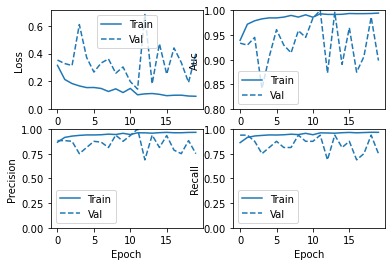

In [11]:
cnn.plot_history()

In [12]:
cnn.get_classification_report(test_set)

              precision    recall  f1-score   support

      NORMAL       0.38      0.30      0.34       234
   PNEUMONIA       0.63      0.70      0.66       390

    accuracy                           0.55       624
   macro avg       0.50      0.50      0.50       624
weighted avg       0.53      0.55      0.54       624



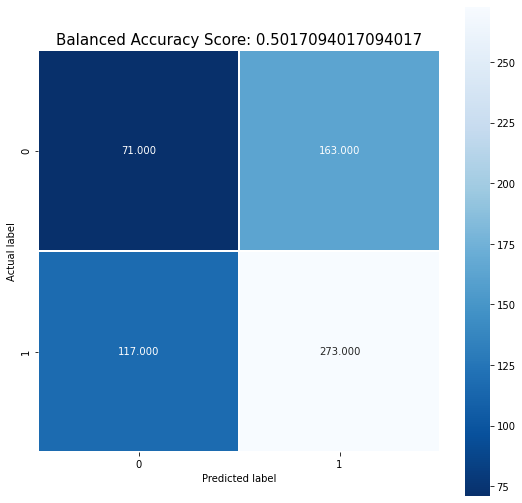

In [13]:
cnn.display_confusion_matrix(test_set)